<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
cat = [i for i in df.columns if df[i].dtype == 'O']
num = [i for i in df.columns if df[i].dtype != 'O']
print(cat ,'\n', num)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'] 
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
for i in df.columns:
  print(df[i].value_counts() , "\n======================================\n")

age
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
88      2
93      2
95      1
89      1
Name: count, Length: 76, dtype: int64 

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64 

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64 

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64 

default
no     10994
yes      168
Name: count, dtype: int64 

balance
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 8585      1
-159       1
-132       1
 4576      1
 6691      1
Name: count, Length: 3805, dtype: int64 

housing
no     5881
yes    5281
Name: count, dtype: int64 

loan
no     9702
yes    1460
Name: cou

In [9]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [10]:
!pip install category_encoders

In [11]:
x = df.drop('deposit' , axis=1)
y = df['deposit']

In [12]:
import category_encoders as ce
cat.remove('deposit')

lb = ce.OneHotEncoder(cols=cat, use_cat_names=True)
x = lb.fit_transform(x)

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
x['pdays'].nunique()

472

In [15]:
x['pdays'].value_counts()

,count
pdays,
-1,8324
92,106
182,89
91,84
181,81
...,...
717,1
159,1
118,1


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dfscaled = sc.fit_transform(x)
x = pd.DataFrame(dfscaled , columns=x.columns)

In [17]:
x.head()

,age,job_admin.,job_technician,job_services,job_management,job_retired,job_blue-collar,job_unemployed,job_entrepreneur,job_housemaid,...,month_apr,month_sep,duration,campaign,pdays,previous,poutcome_unknown,poutcome_other,poutcome_failure,poutcome_success
0,1.491505,2.714280,-0.441818,-0.300242,-0.546362,-0.273721,-0.459229,-0.18177,-0.173997,-0.158636,...,-0.300242,-0.171522,1.930226,-0.554168,-0.481184,-0.36326,0.583626,-0.224814,-0.35159,-0.325782
1,1.239676,2.714280,-0.441818,-0.300242,-0.546362,-0.273721,-0.459229,-0.18177,-0.173997,-0.158636,...,-0.300242,-0.171522,3.154612,-0.554168,-0.481184,-0.36326,0.583626,-0.224814,-0.35159,-0.325782
2,-0.019470,-0.368422,2.263377,-0.300242,-0.546362,-0.273721,-0.459229,-0.18177,-0.173997,-0.158636,...,-0.300242,-0.171522,2.929901,-0.554168,-0.481184,-0.36326,0.583626,-0.224814,-0.35159,-0.325782
3,1.155733,-0.368422,-0.441818,3.330642,-0.546362,-0.273721,-0.459229,-0.18177,-0.173997,-0.158636,...,-0.300242,-0.171522,0.596366,-0.554168,-0.481184,-0.36326,0.583626,-0.224814,-0.35159,-0.325782
4,1.071790,2.714280,-0.441818,-0.300242,-0.546362,-0.273721,-0.459229,-0.18177,-0.173997,-0.158636,...,-0.300242,-0.171522,0.867171,-0.186785,-0.481184,-0.36326,0.583626,-0.224814,-0.35159,-0.325782


In [18]:
y

,deposit
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
11157,no
11158,no
11159,no
11160,no


In [19]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [21]:
y = pd.Series(y)
y.value_counts()

,count
0,5873
1,5289


In [22]:
from sklearn.model_selection import train_test_split
xtrain  , xtest , ytrain , ytest = train_test_split(x ,y ,random_state=40 , test_size=0.3 , stratify=y)

In [23]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((7813, 51), (3349, 51), (7813,), (3349,))

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import accuracy_score ,classification_report
from imblearn.over_sampling import SMOTE

In [25]:
sm = SMOTE(random_state=42)
Xtrain, Ytrain = sm.fit_resample(xtrain, ytrain)

In [26]:
rn = RandomForestClassifier(n_estimators=200 , criterion='gini' , max_depth=10 , n_jobs=-1 , random_state=40)
rn.fit(xtrain , ytrain)
ypred = rn.predict(xtest)
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1762
           1       0.81      0.89      0.85      1587

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [28]:
params = {
    'n_estimators' : [100,200,300],
    'criterion' : ['gini' , 'entropy'],
    'max_depth' : range(7 , 21),
    'class_weight' : ['balanced', None]
}

rns = RandomizedSearchCV(rn , param_distributions=params , n_iter=10 , scoring='f1' , cv=5 , n_jobs=-1 , random_state=42)
rns.fit(xtrain , ytrain)
print(rns.best_estimator_)
model = rns.best_estimator_
ypred = model.predict(xtest)
ypredtrain = model.predict(xtrain)
print(classification_report(ytest , ypred))
print('\n=======================================================\n')
print(classification_report(ytrain , ypredtrain))

RandomForestClassifier(max_depth=18, n_estimators=300, n_jobs=-1,
                       random_state=40)
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1762
           1       0.82      0.90      0.86      1587

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



Text(0.5, 1.0, 'ACCURACY')

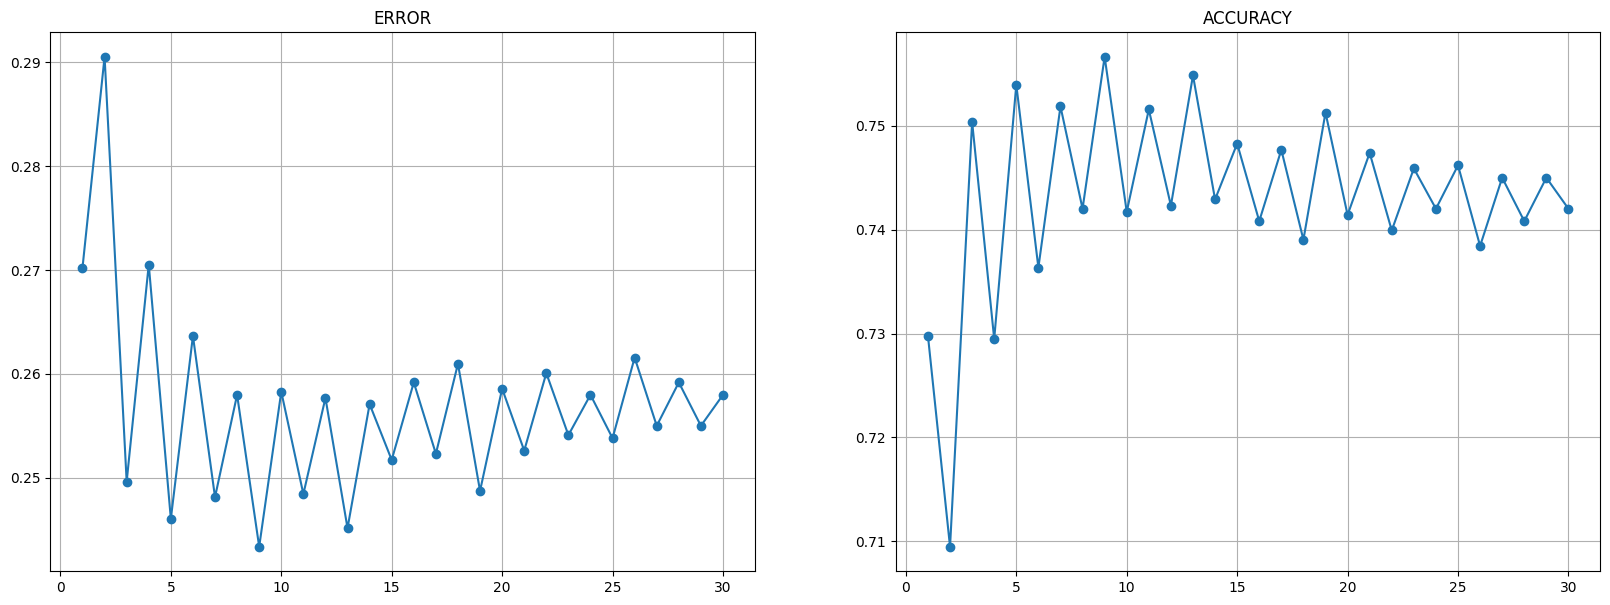

In [29]:
k = 30
error = []
acc = []
for i in range(1,k+1):
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(xtrain , ytrain)
  ypred = kn.predict(xtest)
  error.append(1 - accuracy_score(ytest , ypred))
  acc.append(accuracy_score(ytest , ypred))

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,31) , error , marker='o')
plt.grid()
plt.title('ERROR')

plt.subplot(1,2,2)
plt.plot(range(1,31) , acc , marker='o')
plt.grid()
plt.title('ACCURACY')

In [34]:
kn = KNeighborsClassifier(n_neighbors=9)
kn.fit(xtrain , ytrain)
ypredtrain = kn.predict(xtrain)
ypred = kn.predict(xtest)
print(classification_report(ytrain , ypredtrain))
print('\n=======================================================\n')
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4111
           1       0.84      0.73      0.78      3702

    accuracy                           0.80      7813
   macro avg       0.81      0.80      0.80      7813
weighted avg       0.81      0.80      0.80      7813



              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1762
           1       0.79      0.67      0.72      1587

    accuracy                           0.76      3349
   macro avg       0.76      0.75      0.75      3349
weighted avg       0.76      0.76      0.75      3349



In [37]:
ds = DecisionTreeClassifier(criterion='gini' , max_depth=18 , random_state=40)
ds.fit(xtrain , ytrain)
ypred = ds.predict(xtest)
ypredxtrain = ds.predict(xtrain)

print(classification_report(ytrain , ypredtrain))
print('\n=======================================================\n')
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4111
           1       0.84      0.73      0.78      3702

    accuracy                           0.80      7813
   macro avg       0.81      0.80      0.80      7813
weighted avg       0.81      0.80      0.80      7813



              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1762
           1       0.79      0.76      0.78      1587

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [38]:
lg = LogisticRegression()
lg.fit(xtrain , ytrain)
ypred = lg.predict(xtest)
ypredxtrain = lg.predict(xtrain)

print(classification_report(ytrain , ypredtrain))
print('\n=======================================================\n')
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4111
           1       0.84      0.73      0.78      3702

    accuracy                           0.80      7813
   macro avg       0.81      0.80      0.80      7813
weighted avg       0.81      0.80      0.80      7813



              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1762
           1       0.82      0.81      0.82      1587

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [39]:
svm = SVC()
svm.fit(xtrain , ytrain)
ypred = svm.predict(xtest)
ypredxtrain = svm.predict(xtrain)

print(classification_report(ytrain , ypredtrain))
print('\n=======================================================\n')
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4111
           1       0.84      0.73      0.78      3702

    accuracy                           0.80      7813
   macro avg       0.81      0.80      0.80      7813
weighted avg       0.81      0.80      0.80      7813



              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1762
           1       0.82      0.86      0.84      1587

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

